# NE 630 - Lesson 6

  - Review interaction probabilities
  - Connect theoretical cross section model to tabulated data
  
If time:
  - Apply basic definitions for probabilities
  - Play with random numbers

# Interaction Probabilities

A small sample of a 1-to-1 mixture of water and U-235 is irradiated uniformly in flux $\phi$ [n/cm$^2$ s].  The appropriate cross sections are below (assume all other interactions are negligible)

| nuclide    | reaction   |  value |
| ---------- | ---------- | ------ |
| H-1        | $\sigma_e$ |  20 b  |
|            | $\sigma_{\gamma}$ |  0.1 b  |
| O-16       | $\sigma_e$ | 4 b |
| U-235      | $\sigma_e$ |  15 b |
|            | $\sigma_{\gamma}$ | 100 b |
|            | $\sigma_{f}$ | 500 b |

If a neutron interacts, what is the probability that it...
 - elastically scatters off of *any* nucleus?
 - elastically scatters off of H-1?
 - is absorbed by U-235?
 
If the neutron is *absorbed*, what is the probability that it causes fission?

In [35]:
# assume n_H1 = 2 a/cm^3; then n_O16=n_U235=1. 

σ_H1_e,  σ_H1_γ = 20, 0.1
σ_O16_e = 4
σ_U235_e, σ_U235_γ, σ_U235_f = 15, 100, 500 

Σ_S = 2*σ_H1_e + 1*σ_O16_e + 1*σ_U235_e
Σ_A = 2*σ_H1_γ + 1*(σ_U235_γ+σ_U235_f)
Σ_T = Σ_S + Σ_A

Σ_S/Σ_T, 2*σ_H1_e/Σ_T, (σ_U235_γ+σ_U235_f)/Σ_T, σ_U235_f/Σ_A

(0.08950242718446601,
 0.06067961165048543,
 0.9101941747572815,
 0.8330556481172942)

# Whence a Resonance?

# The Single-Level Breit-Wigner Approximation

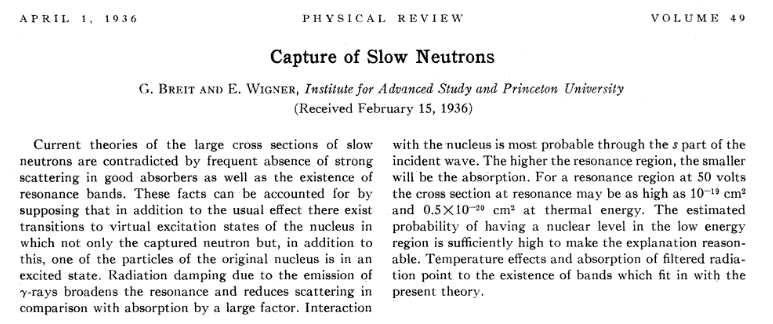

The earliest (1930's) quantum mechanical work of Breit and Wigner led to these expressions for the capture and elastic scattering cross sections near resonance energy $E_r$:

$$
\sigma_{\gamma}(E) = \sigma_0 \frac{\Gamma_{\gamma}}{\Gamma} \left (\frac{E_r}{E} \right)^{1/2} \frac{1}{1+ 4(E-E_r)^2/\Gamma^2}
\tag{FNRP 2.41}
$$

$$
\sigma_{n}(E) = \sigma_0 \frac{\Gamma_{n}}{\Gamma}  \frac{1}{1+ 4(E-E_r)^2/\Gamma^2}
              + \sigma_0 \frac{2R}{\lambda_0} \frac{ 2(E-E_r)/\Gamma }{1 + 4 (E-E_r)^2/\Gamma^2} + 4\pi R^2
\tag{FNRP 2.42}
$$

**Key Point**:  Cross sections are often represented with a large number of "resonance parameters" (i.e., the $\Gamma$'s, $E_r$'s, etc.  The values come from fitting to experiment...

**Example**: Let's construct $\sigma_{\gamma}(E)$ for ${}^{238}$U around its first resonance (at $E = 6.67$ eV) using the (single-level) Breit-Wigner formula.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Er = 6.67     # resonance energy
Gn = 1.476e-3 # elastic width
Gg = 2.3e-2   # gamma width
G = Gn+Gg     # total width
lambda_0 = 4.55e-10/np.sqrt(Er)    # reduced wavelength at E=Er
sigma_0 = 4*np.pi*lambda_0**2*Gn/G # peak value of sigma(E)

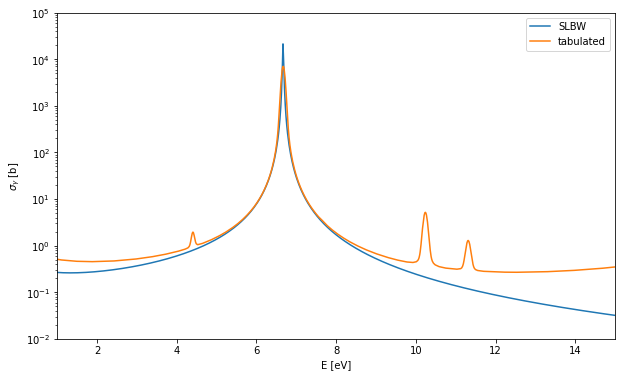

In [3]:
E = np.linspace(1, 20, 1000) # energies for plotting

# reconstruct the cross section and scale to barns
sigma_g = sigma_0 * (Gg/G)*np.sqrt(Er/E) / (1+4*(E-Er)**2/G**2)
sigma_g *= 1e24

# Load the precomputed data from last time
E_238, sig_g_238 = np.loadtxt("./cross_section_data/U238_g.txt", 
                              unpack=True, delimiter=",", skiprows=1)

plt.figure(figsize=(10,6))
plt.semilogy(E, sigma_g, label="SLBW")
plt.semilogy(E_238, sig_g_238, label="tabulated")
plt.xlim(1, 15); plt.ylim(1e-2, 1e5); 
plt.xlabel('E [eV]'); plt.ylabel('$\sigma_{\gamma}$ [b]'); plt.legend()

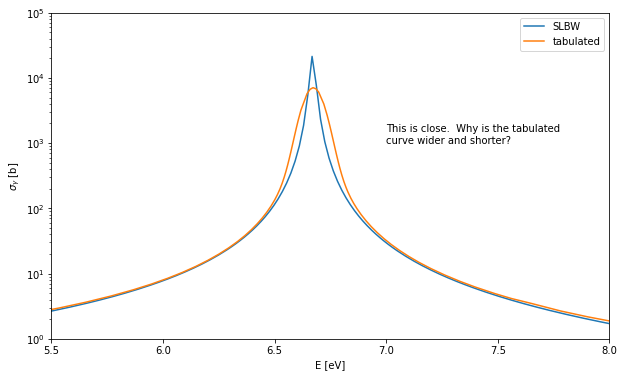

In [4]:
plt.figure(figsize=(10,6))
plt.semilogy(E, sigma_g, label="SLBW")
plt.semilogy(E_238, sig_g_238, label="tabulated")
plt.text(7, 1e3, "This is close.  Why is the tabulated\ncurve wider and shorter?")
plt.xlim(5.5, 8); plt.ylim(1, 1e5); plt.xlabel('E [eV]'); 
plt.ylabel('$\sigma_{\gamma}$ [b]'); plt.legend();

**Example**:  Let's do the same for elastic scattering.

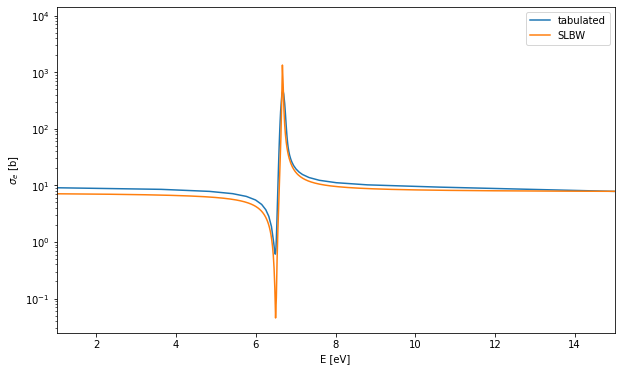

In [15]:
# reconstruct the cross section and scale to barns
R = 1.25*238**(1/3)*1e-13 # cm, nuclear radius
sigma_e = sigma_0 * (Gn/G)/(1+4*(E-Er)**2/G**2) + \
          sigma_0*2*R/lambda_0 * (2*(E-Er)/G)/(1+4*(E-Er)**2/G**2) + \
          4*np.pi*R**2
sigma_e *= 1e24


# Load the precomputed data from last time
E_238, sig_e_238 = np.loadtxt("./cross_section_data/U238_e.txt", 
                              unpack=True, delimiter=",", skiprows=1)
plt.figure(figsize=(10,6))
plt.semilogy(E_238, sig_e_238, label="tabulated")
plt.semilogy(E, sigma_e, label="SLBW")                                               
plt.xlim(1, 15); plt.xlabel('E [eV]'); plt.ylabel('$\sigma_{e}$ [b]'); plt.legend();

Comments:

  - For constructing $\sigma_{\gamma}(E)$ with *multiple* resonances (as for the homework), use the parameters for the $i$th resonance (i.e., the $i$ row in the table) to produce $\sigma_{\gamma, i}(E)$, and then add them together.
  - All Monte Carlo codes like MCNP, PHITS, etc., use ACE files that are similar to our tabulated data (i.e., $\sigma$ values at a bunch of energies).
  - The data provided by evaluators is in the form of resonance parameters (very similar to our SLBW parameters), but the models are more complex (from SLBW to MLBW to full "R-matrix theory")
  - Tools like NJOY, PREPRO, and AMPX are needed to process the resonance parameters into the forms we use in codes.

# Appendix: Probability Density Functions

A probability density function (or pdf) is any function $f(x)$ that satisfies:

  - $f(x) \geq 0$ for $a \leq x \leq b$
  - $f(x) = 0$ for $x < a$ and $x > b$
  - $\int^b_a f(x) dx = 1$
  
Such functions are used to describe random phenomena where some observable $X$ takes on a value $X=x$ or falls in a range $X \in [x, x+dx]$ (don't worry about the semantics!).

For continuous random variables, only *finite ranges* make sense, i.e, the probability that $x$ is between $x_L$ and $x_U$ is $\int^{x_U}_{x_L} f(x) dx$.

## Common (Continuous) Probability Distributions

 - uniform 
 - exponential 
 - normal (aka Gaussian)

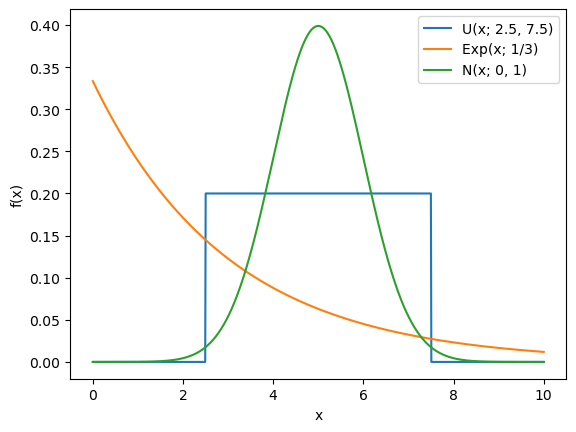

In [7]:
from scipy.stats import uniform, expon, norm
x = np.linspace(0, 10, 1000)
 
plt.plot(x, uniform.pdf(x, loc=2.5, scale=5.0), label="U(x; 2.5, 7.5)")
plt.plot(x, expon.pdf(x, loc=0.0, scale=3.0), label="Exp(x; 1/3)")
plt.plot(x, norm.pdf(x, loc=5.0, scale=1.0), label="N(x; 0, 1)")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.legend();

## Computing Probabilities

The probability that $x$ is between $x_L$ and $x_U$ is $\int^{x_U}_{x_L} f(x) dx$.

**Example**:  Suppose $x \sim \Sigma e^{-\Sigma x}$.  What's the probability that $x \in [1, 2]$ if $\Sigma = 2$?

In [38]:
from scipy.integrate import quad

f = lambda x: 2*np.exp(-2*x)
quad(f, 1, 2)

(0.1170196443478785, 1.2991790348846178e-15)

## Expectation Values

Given a pdf $f(x)$, the expected value of any function $g(x)$ is 

$$
  E[g(x)] = \int^{b}_{a} f(x) g(x) dx \, .
$$

What if $g(x)$ is...
  
  - $x$?  
  - $(x - E[x])^2$?
  

# Playing with Random Numbers

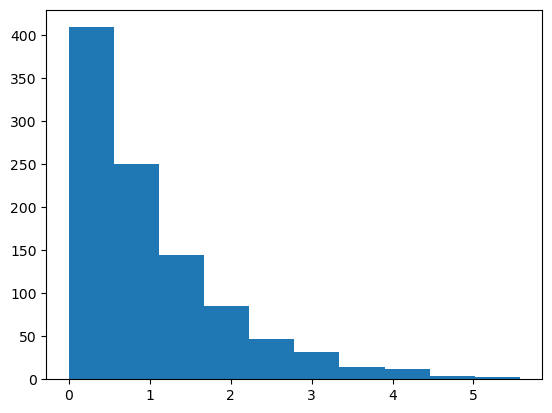

In [8]:
Sigma = 1.0
num_particles = 1000
distance = expon.rvs(scale=1/Sigma, size=num_particles)
plt.hist(distance);